--- 1. Creating Synthetic Dataset ---
First 5 rows of the dataset:
   Study Hours  Attendance  Pass
0     6.993428   58.769439     0
1     5.723471   73.690320     0
2     7.295377   74.859282     1
3     9.046060   67.965841     1
4     5.531693   77.580714     1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  100 non-null    float64
 1   Attendance   100 non-null    float64
 2   Pass         100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB

Descriptive Statistics:
       Study Hours  Attendance        Pass
count   100.000000  100.000000  100.000000
mean      5.794702   79.520236    0.600000
std       1.809781   12.667237    0.492366
min       1.000000   51.218432    0.000000
25%       4.798189   67.915092    0.000000
50%       5.746087   81.261608    1.000000
75%       6.811904   88.072557 

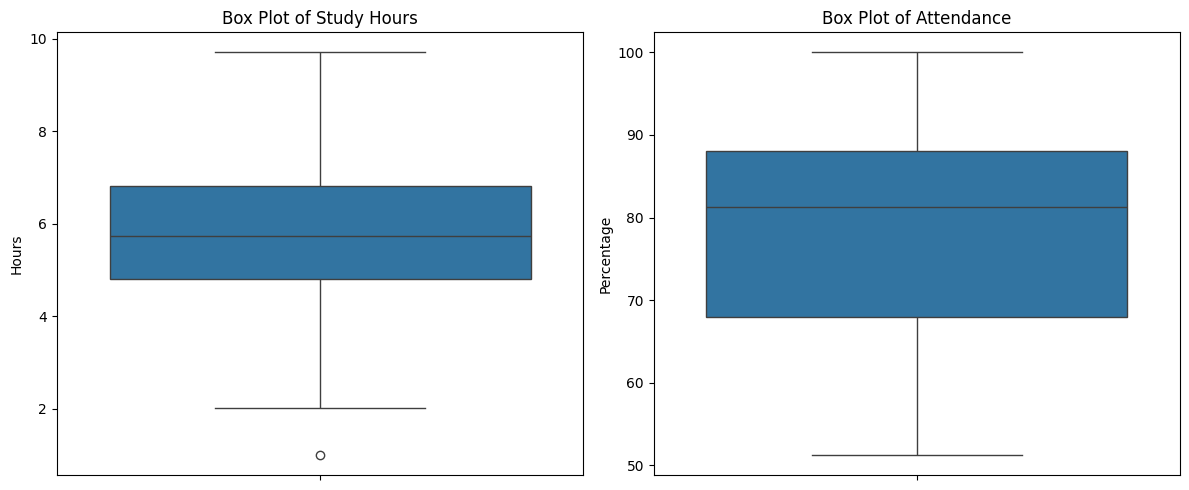

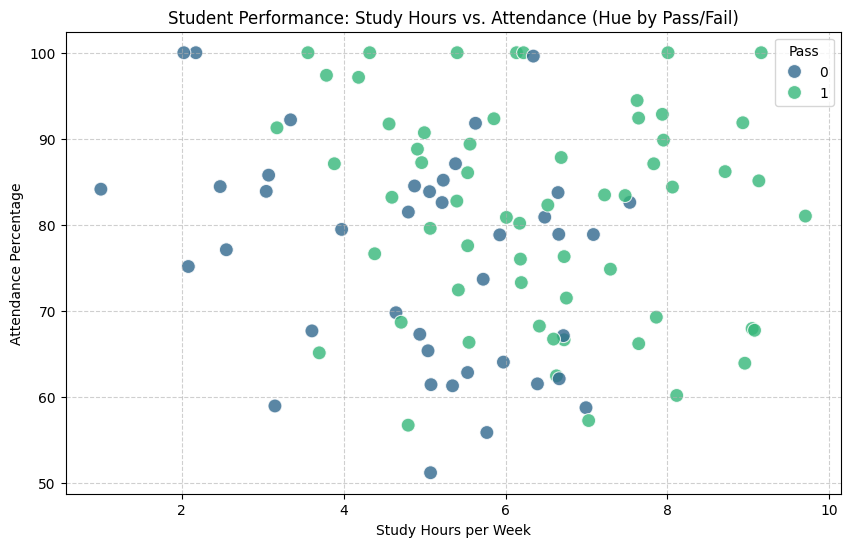


--- 3. Model Training ---
Training set size: 80 samples
Testing set size: 20 samples

Model training complete.

--- 4. Model Evaluation ---

Accuracy: 0.7500

Confusion Matrix:
[[6 2]
 [3 9]]


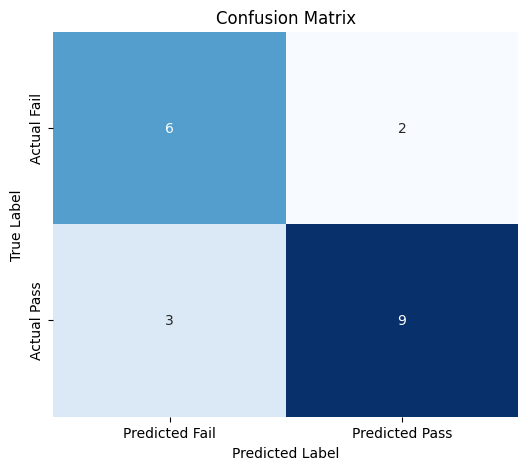


Classification Report:
              precision    recall  f1-score   support

        Fail       0.67      0.75      0.71         8
        Pass       0.82      0.75      0.78        12

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20


--- 5. Insights ---
Model Coefficients: [0.68721086 0.05667133]
Feature names: ['Study Hours', 'Attendance']


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print("--- 1. Creating Synthetic Dataset ---")
np.random.seed(42) 


num_students = 100


study_hours = np.random.normal(loc=6, scale=2, size=num_students)
study_hours = np.clip(study_hours, 1, 12) 


attendance = np.random.normal(loc=80, scale=15, size=num_students)
attendance = np.clip(attendance, 40, 100) 


prob_pass = 1 / (1 + np.exp(-(0.5 * (study_hours - 6) + 0.05 * (attendance - 70))))
pass_status = (np.random.rand(num_students) < prob_pass).astype(int)

data = pd.DataFrame({
    'Study Hours': study_hours,
    'Attendance': attendance,
    'Pass': pass_status
})

print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nDescriptive Statistics:")
print(data.describe())


print("\n--- 2. Data Exploration ---")


print("\nMissing values per column:")
print(data.isnull().sum())



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Study Hours'])
plt.title('Box Plot of Study Hours')
plt.ylabel('Hours')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Attendance'])
plt.title('Box Plot of Attendance')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=data, palette='viridis', s=100, alpha=0.8)
plt.title('Student Performance: Study Hours vs. Attendance (Hue by Pass/Fail)')
plt.xlabel('Study Hours per Week')
plt.ylabel('Attendance Percentage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


print("\n--- 3. Model Training ---")


X = data[['Study Hours', 'Attendance']]
y = data['Pass']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("\nModel training complete.")


print("\n--- 4. Model Evaluation ---")


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fail', 'Pass']))


print("\n--- 5. Insights ---")

print(f"Model Coefficients: {model.coef_[0]}")
print(f"Feature names: {X.columns.tolist()}")

